In [60]:
import os
import numpy as np
result=[]
def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.txt': 
                    print(full_filename)
                    result.append(full_filename)
    except PermissionError:
        pass

search("/home/lab/dataset/CK+_image/")

/home/lab/dataset/CK+_image/label/Emotion/S105/008/S105_008_00000010_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S158/002/S158_002_00000011_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S106/004/S106_004_00000008_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S106/002/S106_002_00000016_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S106/006/S106_006_00000011_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/005/S065_005_00000008_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/004/S065_004_00000028_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/002/S065_002_00000022_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/003/S065_003_00000022_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S132/005/S132_005_00000016_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S132/008/S132_008_00000010_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S132/002/S132_002_00000018_emotion.txt
/home/lab/dataset/CK+_image/

In [61]:
landmark_path="/home/lab/dataset/CK+Landmarks/Landmarks"
image_path="/home/lab/dataset/CK+_image/cohn-kanade-images"
Face_path="/home/lab/dataset/CK+FACE/FACS"

In [79]:
image=[]
landmark=[]
for i in range(len(result)):
    new_file=result[i][-39:-12]
    label_landmark_path = landmark_path+new_file+"_landmarks.txt"
    label_image_path = image_path+new_file+".png"
    ##################image#######################
    img=plt.imread(label_image_path)
    ##################Landmark####################
    f=open(label_landmark_path)
    lines=f.readlines()
    x=[]
    y=[]
    for i in range(len(lines)):
        x.append(float(lines[i][3:7])*100)
        y.append(float(lines[i][-14:-10])*100)
    x=np.array([x],dtype=np.uint16)
    y=np.array([y],dtype=np.uint16)
    z=np.concatenate((x,y),axis=0)
    image.append(img)
    landmark.append(z)

In [80]:
image=np.array(image)
landmark=np.array(landmark)

/home/lab/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [81]:
len(image)

327

In [82]:
len(landmark)

327

In [83]:
np.save("/home/lab/양창희/Emotion Project/CK+/rotate_img/landmark_plus/image.npy",image)
np.save("/home/lab/양창희/Emotion Project/CK+/rotate_img/landmark_plus/landmark.npy",landmark)

In [87]:
import matplotlib.pyplot as plt
img=plt.imread(label_image_path)

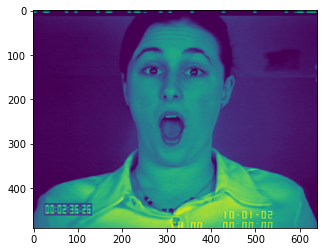

In [88]:
plt.imshow(img)

In [89]:
f=open(label_landmark_path)

In [90]:
lines=f.readlines()

In [97]:
x=[]
y=[]
for i in range(len(lines)):
    x.append(float(lines[i][3:7])*100)
    y.append(float(lines[i][-14:-10])*100)

In [98]:
import numpy as np
x=np.array([x],dtype=np.int16)
y=np.array([y],dtype=np.int16)

In [99]:
import cv2
for j in range(68):
    cv2.putText(img,str(j),(x[0][j],y[0][j]),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.1,(0,0,255))

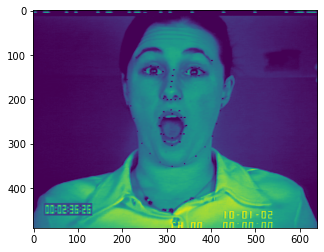

In [100]:
plt.imshow(img)

f=open(label_face_path)
lines=f.readlines()
w=[]
h=[]
w.append(float(lines[0][3:7])*100)
w.append(float(lines[1][3:7])*100)

h.append(float(lines[2][3:7])*100)
h.append(float(lines[3][3:7])*100)
w=np.array(w,dtype=np.uint16)
h=np.array(h,dtype=np.uint16)
img=cv2.rectangle(img,(w[0],h[0]),(w[1],h[1]),(255,0,0))

In [101]:
x,y

(array([[210, 214, 218, 225, 233, 243, 261, 284, 311, 339, 363, 384, 400,
         409, 418, 423, 429, 229, 240, 252, 268, 284, 341, 360, 378, 390,
         399, 314, 311, 309, 307, 291, 299, 307, 317, 327, 249, 262, 278,
         289, 275, 261, 342, 355, 371, 381, 369, 354, 281, 281, 291, 308,
         326, 338, 342, 336, 327, 310, 293, 285, 284, 291, 310, 330, 340,
         329, 310, 291]], dtype=int16),
 array([[157, 186, 216, 244, 273, 300, 323, 343, 352, 346, 329, 308, 284,
         256, 227, 199, 171, 107, 941, 833, 798, 850, 850, 827, 861, 994,
         114, 135, 148, 161, 173, 199, 202, 202, 202, 200, 136, 126, 128,
         139, 146, 145, 140, 130, 130, 141, 148, 146, 261, 243, 229, 225,
         227, 242, 260, 279, 297, 305, 296, 279, 261, 242, 234, 242, 261,
         279, 288, 280]], dtype=int16))

In [96]:
img.shape

(490, 640)